In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time

In [2]:
start=time.time()
end=time.time()
print(end-start)

0.0


In [3]:
mat = scipy.io.loadmat('mnist-original.mat')
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])

In [4]:
X = [] # on créé une nouvelle liste qui va contenir nos vecteurs 784
for i in range(len(data)):
    X.append(data[i].reshape(28*28,1))

def index_chiffre(n,y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    index = []           # j'ai rajouté le y dans les arguments car je me servirai de cette fonction dans la suite
    for i in range(len(y)):
        if y[i]==n:
            index.append(i)
    return index

In [5]:
X_train, X_test, y_train, y_test = [], [], [], [] # comme la base de donnée est ordonnée, pour pouvoir diviser en train et test
for i in range(10): # on doit diviser en train test chaque set de chiffre, pour 0 pour 1 etc et on met tout dans nos matrices défeinies juste avant
    temp_x = [] # variable temporaire qui va contenir les matrices représentants le chiffre i
    temp_y = [] # variable temporaire qui va contenir les indexes représentants le chiffre i
    for j in index_chiffre(i,label):
        temp_x.append(X[j])
        temp_y.append(label[j])
    x_train, x_test, Y_train, Y_test = train_test_split(temp_x, temp_y, test_size=0.2) # on divise en train test pour chaque jeu de matrice représentant le chiffre i
    X_train += x_train # à chaque itération on les mets dans nos matrices précédemment définies
    X_test += x_test
    y_train += Y_train
    y_test += Y_test

In [6]:
def concat(k,X,y):
    res = np.zeros((28*28,len(index_chiffre(k,y))))
    for i,j in zip(index_chiffre(k,y),range(len(index_chiffre(k,y)))):
        res[:,j]=X[i][:,0]
    return res

**Création de la liste de dix matrices représentative des 10 chiffres**

In [7]:
start=time.time()
mat_chiffres = [] #future liste de 10 matrices ou mat_chiffres[i]=la matrice avec tous les représentations de i en colonnes
for k in range(10):
    mat_chiffres.append(concat(k,X_train,y_train)) 
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

Temps de réalisation : 7.127580404281616 secondes


**Création des décompositions SVD des dix matrices**

In [8]:
start=time.time()
U,S,V = [],[],[]
for k in range(10):
    U_temp,S_temp,V_temp = np.linalg.svd(mat_chiffres[k])
    U.append(U_temp)
    S.append(S_temp)
    V.append(V_temp)
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

Temps de réalisation : 57.049805879592896 secondes


**Fonction qui donne la norme de la résiduelle de la photo test "x" a l'espace du nombre "n" en utilisant les "k" premiers éléments de la base de l'espace**

In [9]:
def distance(x,n,k):
    sol_min = 0
    for i in range(k):
        sol_min += (float(np.transpose(np.mat(U[n])[:,i])*np.mat(x))/S[n][i])*np.mat(V[n])[:,i]
    return np.linalg.norm(np.mat(mat_chiffres[n])*sol_min - np.mat(x),2)

In [10]:
def prediction(x,k):
    l=[distance(x,n,k) for n in range(10)]
    return (float(l.index(min(l))))

In [11]:
start=time.time()
print(prediction(X_test[5000],3))
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

3.0
Temps de réalisation : 0.09513044357299805 secondes


In [12]:
float(y_test[5000])

3.0

In [20]:
def calcul_pourcentage_tot(k):
    prediction_l = [prediction(x,k) for x in X_test]
    A =[i for i,j in zip(y_test,prediction_l) if i==j]
    return(len(A)*100/len(X_test))

In [24]:
def calcul_pourcentage_num(n,k):
    prediction_l = [prediction(X_test[x],k) for x in index_chiffre(n,y_test)]
    A =[i for i,j in zip([y_test[q] for q in index_chiffre(n,y_test)],prediction_l) if i==j]
    return(len(A)*100/len(X_test))

def calcul_pourcentage_num2(n,k):
    prediction_l = [prediction(X_test[x],k) for x in index_chiffre(n,y_test)]
    res = 0
    for x in prediction_l:
        if x == n :
            res += 1
    return res/len(index_chiffre(n,y_test))

In [26]:
start=time.time()
print(calcul_pourcentage_num2(0,3))
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

0.1788559015206372
Temps de réalisation : 41.11961627006531 secondes


**Calcul précision par chiffre**

In [27]:
start=time.time()
pourcentage = [calcul_pourcentage_num2(n,3) for n in range(10)]
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")

Temps de réalisation : 430.37598180770874 secondes


**Tracé de la précision en fonction du chiffre**

0.23823516903952005


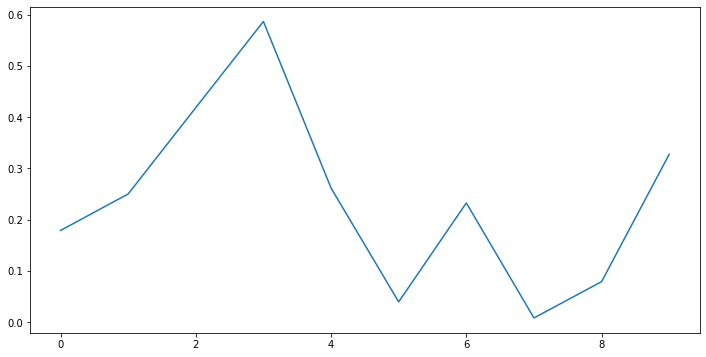

In [28]:
plt.figure(figsize=(12,6))
plt.plot([x for x in pourcentage])
plt.show
print(sum([x for x in pourcentage])/10)

**Calcul précision totale**

In [23]:
start=time.time()
print(calcul_pourcentage_tot(2))
end=time.time()
print(end-start)

26.263924592973435
405.52448415756226
